In [ ]:
import os
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import random
from shutil import copyfile
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


In [ ]:
!unzip /mydrive/dataset_characters.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset_characters/V/V_227.jpg  
  inflating: dataset_characters/V/V_228.jpg  
  inflating: dataset_characters/V/V_229.jpg  
  inflating: dataset_characters/V/V_23.jpg  
  inflating: dataset_characters/V/V_230.jpg  
  inflating: dataset_characters/V/V_231.jpg  
  inflating: dataset_characters/V/V_232.jpg  
  inflating: dataset_characters/V/V_233.jpg  
  inflating: dataset_characters/V/V_234.jpg  
  inflating: dataset_characters/V/V_235.jpg  
  inflating: dataset_characters/V/V_236.jpg  
  inflating: dataset_characters/V/V_237.jpg  
  inflating: dataset_characters/V/V_238.jpg  
  inflating: dataset_characters/V/V_239.jpg  
  inflating: dataset_characters/V/V_24.jpg  
  inflating: dataset_characters/V/V_240.jpg  
  inflating: dataset_characters/V/V_241.jpg  
  inflating: dataset_characters/V/V_242.jpg  
  inflating: dataset_characters/V/V_243.jpg  
  inflating: dataset_characters/V/V_244.jpg  
  inflating: dataset_characters

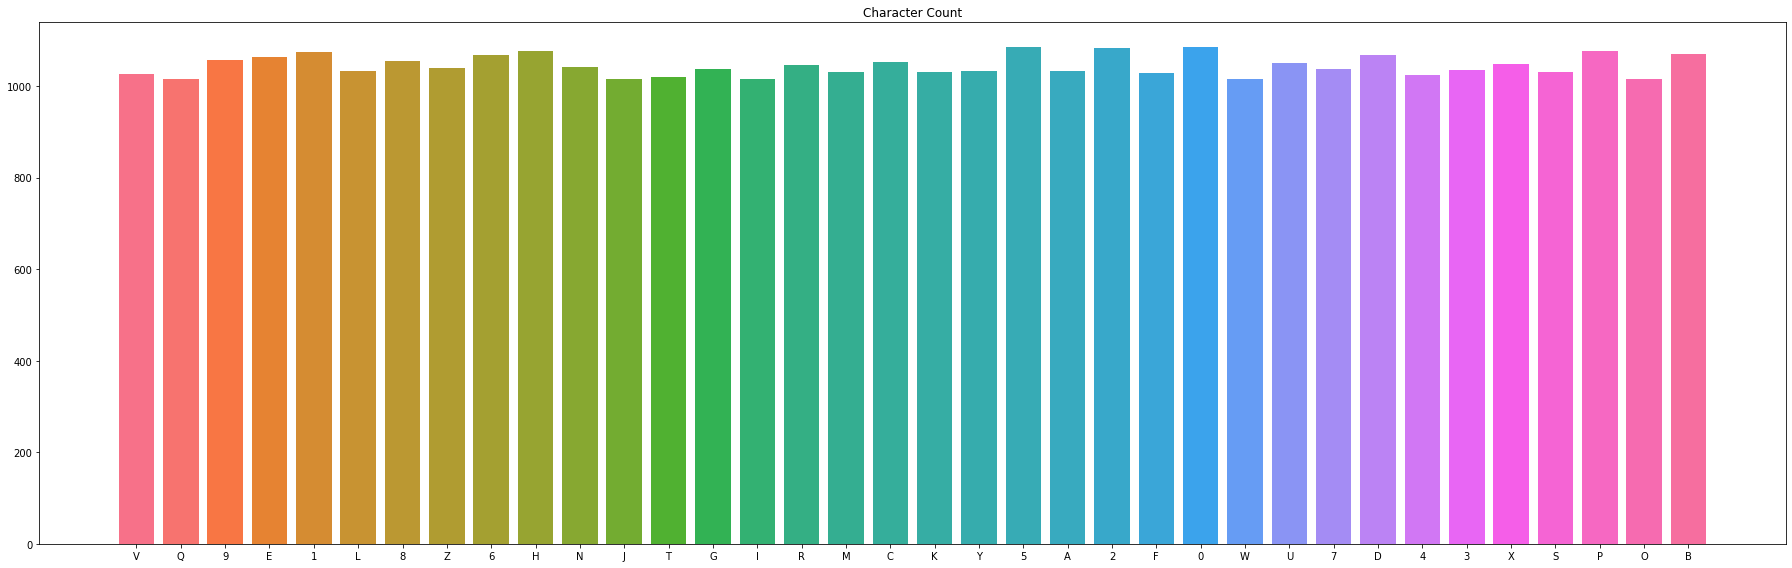

In [ ]:
characters=[]
chara_count = []
for folder in os.listdir('dataset_characters'):
  characters.append(folder)
  chara_count.append(len(os.listdir('dataset_characters/'+folder)))
fig = plt.figure(figsize=(25,8))
plt.bar(characters,chara_count, color = sns.color_palette("husl",len(chara_count)))
plt.title('Character Count')
fig.tight_layout()  

In [ ]:
!mkdir train
!mkdir test

for i in characters:
  os.mkdir('train/'+i)
  os.mkdir('test/'+i)

In [ ]:
def split_data(source,train,test):
  files= []
  for filename in os.listdir(source):
    file = source + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + " is zero length, so ignoring.")

  training_length = int(len(files) * 0.9)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[-testing_length:]

  for filename in training_set:
    this_file = source + filename
    destination = train + filename
    copyfile(this_file, destination)

  for filename in testing_set:
    this_file = source + filename
    destination = test + filename
    copyfile(this_file, destination)

In [ ]:
for i in characters:
  split_data('dataset_characters/'+i+'/','train/'+i+'/','test/'+i+'/')

In [ ]:
customModel1 = Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(96, 96, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(36, activation='softmax')
])
customModel1.summary()

NameError: ignored

In [ ]:
training_datagen = ImageDataGenerator(rotation_range=10,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              fill_mode="nearest",
															rescale = 1./255
                              )

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	'train',
	target_size=(96,96),
	class_mode='categorical',
  batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	'test',
	target_size=(96,96),
	class_mode='categorical',
  batch_size=64
)

Found 33846 images belonging to 36 classes.
Found 3777 images belonging to 36 classes.


In [ ]:
classes = {0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z'}

In [ ]:
customModel1.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history=customModel1.fit(train_generator, epochs=8, validation_data = validation_generator, batch_size = 64,shuffle=False)

Epoch 1/8
529/529 [==============================] - 91s 173ms/step - loss: 0.8737 - accuracy: 0.7552 - val_loss: 0.2762 - val_accuracy: 0.9208
Epoch 2/8
529/529 [==============================] - 90s 170ms/step - loss: 0.3744 - accuracy: 0.8921 - val_loss: 0.2171 - val_accuracy: 0.9388
Epoch 3/8
529/529 [==============================] - 89s 169ms/step - loss: 0.2980 - accuracy: 0.9114 - val_loss: 0.2040 - val_accuracy: 0.9367
Epoch 4/8
529/529 [==============================] - 89s 168ms/step - loss: 0.2572 - accuracy: 0.9231 - val_loss: 0.1448 - val_accuracy: 0.9531
Epoch 5/8
529/529 [==============================] - 88s 167ms/step - loss: 0.2273 - accuracy: 0.9300 - val_loss: 0.1498 - val_accuracy: 0.9508
Epoch 6/8
529/529 [==============================] - 88s 166ms/step - loss: 0.2088 - accuracy: 0.9331 - val_loss: 0.1282 - val_accuracy: 0.9584
Epoch 7/8
529/529 [==============================] - 88s 167ms/step - loss: 0.1862 - accuracy: 0.9403 - val_loss: 0.1165 - val_accuracy:

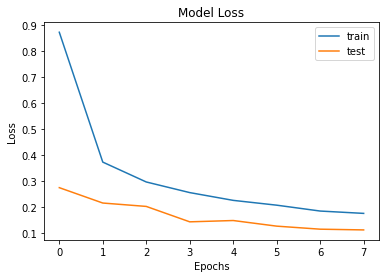

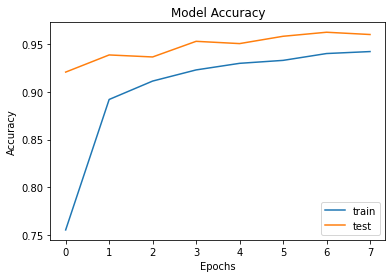

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
!mkdir model

In [ ]:
customModel1.save("model/model.h5")

In [ ]:
img=load_img('G_134.jpg', target_size=(96, 96,3))
x=img_to_array(img)
x=np.expand_dims(x, axis=0)
classes[np.argmax(customModel1.predict(x))]

'G'